## Alzheimer's Disease Detection using CNN

1. `Alzheimer’s disease` is an incurable, progressive neurological brain disorder. Earlier detection of Alzheimer’s disease can help with proper treatment and prevent brain tissue damage.

2. Analysing `Magnetic Resonance Imaging (MRI)` is a common practice for Alzheimer’s disease diagnosis in clinical research. Detection of Alzheimer’s disease is exacting due to the similarity in Alzheimer’s disease MRI data and standard healthy MRI data of older people.

3. They developed rule-based expert systems from 1970s to 1990s and supervised models from 1990s. Feature vectors are extracted from medical image data to train supervised systems. **Extracting those features needs human experts that often require a lot of time, money and effort. With the advancement of deep learning models, now we can extract features directly from the images without the engagement of human experts.**

### Types of Alzheimer's Disease:

`1. Early-onset Alzheimer's:` This type of Alzheimer's is relatively rare, and affects people who are `younger than age 65`. Early-onset Alzheimer's can be caused by genetic mutations that are inherited from a parent.

`2. Late-onset Alzheimer's:` This is the most common type of Alzheimer's disease, and typically `affects people over the age of 65.` The exact cause of late-onset Alzheimer's is not fully understood, but it is believed to be influenced by a combination of genetic, environmental, and lifestyle factors.

### Symptoms of Alzheimer's Disease

`Memory loss:` People with Alzheimer's often forget recently learned information or important dates and events, and may repeatedly ask for the same information.

`Difficulty with problem-solving or planning:` Alzheimer's can affect a person's ability to make and carry out plans, and to perform tasks that involve multiple steps or decision-making.

`Challenges with daily tasks:` People with Alzheimer's may struggle with routine activities such as cooking, cleaning, or paying bills.

`Confusion with time and place:` Alzheimer's can cause people to lose track of dates, seasons, and the passage of time, and to become disoriented or lost in familiar places.

`Trouble with language:` Alzheimer's can make it difficult to find the right words, to follow or join a conversation, and to understand written or spoken information.

`Poor judgment:` People with Alzheimer's may make poor decisions, such as giving away large sums of money to telemarketers or forgetting to pay bills.

`Social withdrawal:` Alzheimer's can cause people to become less interested in social activities, hobbies, or other things they once enjoyed.

`Changes in mood or personality:` Alzheimer's can lead to depression, anxiety, irritability, or other changes in mood or behavior that are not typical for the person.

## Differente Classes of Alzheimer's Disease

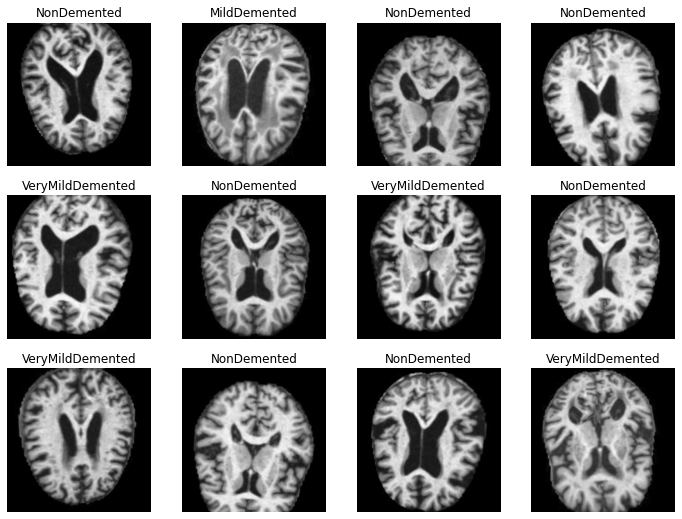

## 1.  Import Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

from tensorflow.keras import Sequential, Input
from tensorflow.keras.layers import Dense, Dropout, Conv2D, Flatten, SeparableConv2D, BatchNormalization, MaxPool2D
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing.image import ImageDataGenerator as IDG

` 1. ImageDataGenerator` is a class in the Keras deep learning library that allows you to easily perform data augmentation on image data during the training of deep neural networks. 

` 2. Batch normalization` is a technique used in deep neural networks to improve the performance and stability of the model during training. It involves `normalizing the input` to each layer of the network across the current batch of training examples.



` 3. Confusion Matrix` is a performance evaluation metric used in machine learning and statistical classification tasks to evaluate the performance of a classifier model.

The purpose of `Confusion Matrix` is to `count the number of True_Positive, True_Negative, False_Positive, and False_Negative predictions` made by a classifier model on a given set of test data.

Where `True_Negatives` is the number of samples that are actually negative and are correctly predicted as negative, `False_Positives` is the number of samples that are actually negative but are incorrectly predicted as positive, `False_Negatives` is the number of samples that are actually positive but are incorrectly predicted as negative, `True_Positives` is the number of samples that are actually positive and are correctly predicted as positive.


The Confusion Matrix metric is useful for evaluating the performance of a classifier model in terms of its `Accuracy`, `Precision`, `Recall`, `F1 Score`, and other performance metrics.

## 2. Defining Train and Test Dataset Paths

In [2]:
BASE_DIR = "Alzheimer_Dataset/" # stores the base directory for the dataset.

TRAIN_DIR = BASE_DIR + 'train' # stores the path to the directory containing the training images.

TEST_DIR = BASE_DIR + 'test'  # stores the path to the directory containing the test images.

# Defining different classes of this Alzheimer Disease that the model is being trained to classify

CLASSES = [ 'NonDemented',
            'VeryMildDemented',
            'MildDemented',
            'ModerateDemented']

IMG_SIZE = 176   # images will be resized to 176 x 176 pixels.

# stores the dimensions of the resized images that will be used as input to the model.
DIM = (IMG_SIZE, IMG_SIZE) 

### Four Different Classes as Below
• **NonDemented**: person does not have dementia and is functioning normally.

• **VeryMildDemented**: earliest stage of dementia, where the person may experience some forgetfulness

• **MildDemented**: At this stage, the person's memory and cognitive abilities are noticeably impaired

• **ModerateDemented**: This is a more advanced stage of dementia, where the person's symptoms have worsened and they require more care


## 3. Generating training data from a directory of images.

In [3]:
datagen = IDG(
    rescale = 1./255, # rescales the pixel values of the input images to a range of 0-1 for normalization
    brightness_range=[0.8, 1.2], # specifies a range of brightness levels for the images during training
    zoom_range=[.99, 1.01],  # specifies a range of zoom levels for the images in training
    data_format="channels_last", # specifies the format of the image data.Color channels are in the last dimension of the image array.
    fill_mode='constant', # used for filling in missing pixels when the image is augmented.
    horizontal_flip=True
)

train_data_gen = datagen.flow_from_directory(directory=TRAIN_DIR, target_size=DIM, batch_size=6500, shuffle=False)

Found 5122 images belonging to 4 classes.


## 4. Retrieving Features and Labels

In [4]:
#Retrieving the data from the ImageDataGenerator iterator
train_data, train_labels = train_data_gen.next()

#Getting to know the dimensions of our dataset
print("Shape of Original Training Data",train_data.shape)
print("Shape of Original Training Labels",train_labels.shape)

Shape of Original Training Data (5122, 176, 176, 3)
Shape of Original Training Labels (5122, 4)


## 5. Splitting Data into Training and Testing

In [5]:
#Splitting the data into train, test, and validation sets
train_data, val_data, train_labels, val_labels = train_test_split(train_data, train_labels, test_size = 0.2, random_state=42)

print("Shape of Training Data:", np.shape(train_data))

print("Shape of Validation Data:", np.shape(val_data))

print("Shape of Training Labels:", np.shape(train_labels))

print("Shape of Validation Labels", np.shape(val_labels))

Shape of Training Data: (4097, 176, 176, 3)
Shape of Validation Data: (1025, 176, 176, 3)
Shape of Training Labels: (4097, 4)
Shape of Validation Labels (1025, 4)


The shape of the `training data` is `(4097, 176, 176, 3)`. This indicates that there are `4097 images` in the training set, each of which has a `resolution of 176x176 pixels` and `3 color channels (RGB)`.

The shape of the `validation/test data` is `(1025, 176, 176, 3)`. This indicates that there are `1025 images` in the validation set, each of which has the same resolution and number of channels as the training images.

## 6. Defining the CNN Model

In [6]:
"""Defining a Convolutional NN block for a Sequential CNN model."""

def conv_block(filters, act='relu'):
    
    block = Sequential()
    block.add(Conv2D(filters, 3, activation=act, padding='same'))
    block.add(Conv2D(filters, 3, activation=act, padding='same'))
    block.add(BatchNormalization())    # to normalize the activations of the previous layer
    block.add(MaxPool2D()) # reduce the spatial dimensions of the feature maps i.e max-pooling
    
    return block


"""Defining a Dense NN block for a Sequential CNN model.""" 

def dense_block(units, dropout_rate, act='relu'):
    
    
    block = Sequential()
    block.add(Dense(units, activation=act))
    block.add(BatchNormalization())
    block.add(Dropout(dropout_rate))
    
    return block


"""Constructing a Sequential CNN architecture for performing the classification task."""

def construct_model(act='relu'):
   

    model = Sequential([
        Input(shape=(*[IMG_SIZE,IMG_SIZE], 3)),  # input shape of our images.
        Conv2D(16, 3, activation=act, padding='same'), 
        Conv2D(16, 3, activation=act, padding='same'),
        MaxPool2D(),
        conv_block(32),
        conv_block(64),
        conv_block(128),
        Dropout(0.2),
        conv_block(256),
        Dropout(0.2),
        Flatten(),  # flattens the output of the previous layer into a 1D array
        dense_block(512, 0.7),
        dense_block(128, 0.5),
        dense_block(64, 0.3),
        Dense(4, activation='softmax') # Output layer with softmax acti. function and return 4 classes  
    ], name = "cnn_model")

    return model

1. The `convolutional layers` use different `filter` sizes and `number of
filters (16, 32, 64, 128, and 256)` to `extract features` from the input `image`.

2. The `input to the model` is an `image` with shape `(IMG_SIZE, IMG_SIZE, 3)`, where `3` is the `number of color channels (RGB)`.

3. `same padding` means  the output has the same shape as the input.

4. `dropout layer` to `prevent overfitting` of the model, with a dropout rate of 0.2 (meaning 20% of the input units will be randomly dropped during training)

5. `dense_block` adds a block of fully connected layers, with `512 nodes` and a `dropout rate of 0.7` (meaning 70% of the input units will be randomly dropped during training).

## 7. Defining MyCallback Class

`on_epoch_end` method is a callback function that is `called at the end of each epoch during training`.
If the `validation accuracy` (as specified by ('val_acc')) is `greater than 0.99`.
This will cause the training to terminate early if the validation accuracy reaches a certain threshold.

In [7]:
class MyCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if logs.get('val_acc') > 0.99:
            print("\nReached accuracy threshold! Terminating training.")
            self.model.stop_training = True
            
my_callback = MyCallback()
CALLBACKS = [my_callback]

In [8]:
model = construct_model()   # creates a Keras model

METRICS = [tf.keras.metrics.CategoricalAccuracy(name='acc'),   
           tf.keras.metrics.AUC(name='auc')]  

1. `categorical accuracy metric :` which calculates the accuracy of classification predictions.
2. `Area under the curve (AUC) metric :`  which measures the quality of the model's predicted probabilities.

### 8. Compile Model

In [9]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.CategoricalCrossentropy(),
              metrics=METRICS)

model.summary()

Model: "cnn_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 176, 176, 16)      448       
                                                                 
 conv2d_1 (Conv2D)           (None, 176, 176, 16)      2320      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 88, 88, 16)       0         
 )                                                               
                                                                 
 sequential (Sequential)     (None, 44, 44, 32)        14016     
                                                                 
 sequential_1 (Sequential)   (None, 22, 22, 64)        55680     
                                                                 
 sequential_2 (Sequential)   (None, 11, 11, 128)       221952    
                                                         

## 9. Fit the Model

In [10]:

EPOCHS = 50     # specifies the number of training epochs to run

history = model.fit(train_data, train_labels, validation_data=(val_data, val_labels), callbacks=CALLBACKS, epochs=EPOCHS)


Epoch 1/50
129/129 [==============================] - 165s 1s/step - loss: 1.6964 - acc: 0.3398 - auc: 0.5840 - val_loss: 1.8924 - val_acc: 0.3424 - val_auc: 0.6742
Epoch 2/50
129/129 [==============================] - 174s 1s/step - loss: 1.3017 - acc: 0.4313 - auc: 0.7063 - val_loss: 2.3319 - val_acc: 0.0156 - val_auc: 0.3013
Epoch 3/50
129/129 [==============================] - 176s 1s/step - loss: 1.1322 - acc: 0.4933 - auc: 0.7706 - val_loss: 3.1139 - val_acc: 0.4868 - val_auc: 0.5990
Epoch 4/50
129/129 [==============================] - 203s 2s/step - loss: 1.0006 - acc: 0.5326 - auc: 0.8144 - val_loss: 1.8263 - val_acc: 0.4849 - val_auc: 0.7922
Epoch 5/50
129/129 [==============================] - 180s 1s/step - loss: 0.9638 - acc: 0.5428 - auc: 0.8248 - val_loss: 0.9351 - val_acc: 0.5483 - val_auc: 0.8358
Epoch 6/50
129/129 [==============================] - 177s 1s/step - loss: 0.9529 - acc: 0.5416 - auc: 0.8270 - val_loss: 0.9820 - val_acc: 0.5639 - val_auc: 0.8305
Epoch 7/50

## Accuracy Achieved by model is 97.24 %

## Saving the Model

In [11]:
#model.save('../models/alzheimer_model.h5')

## 10. Plot Model Performance


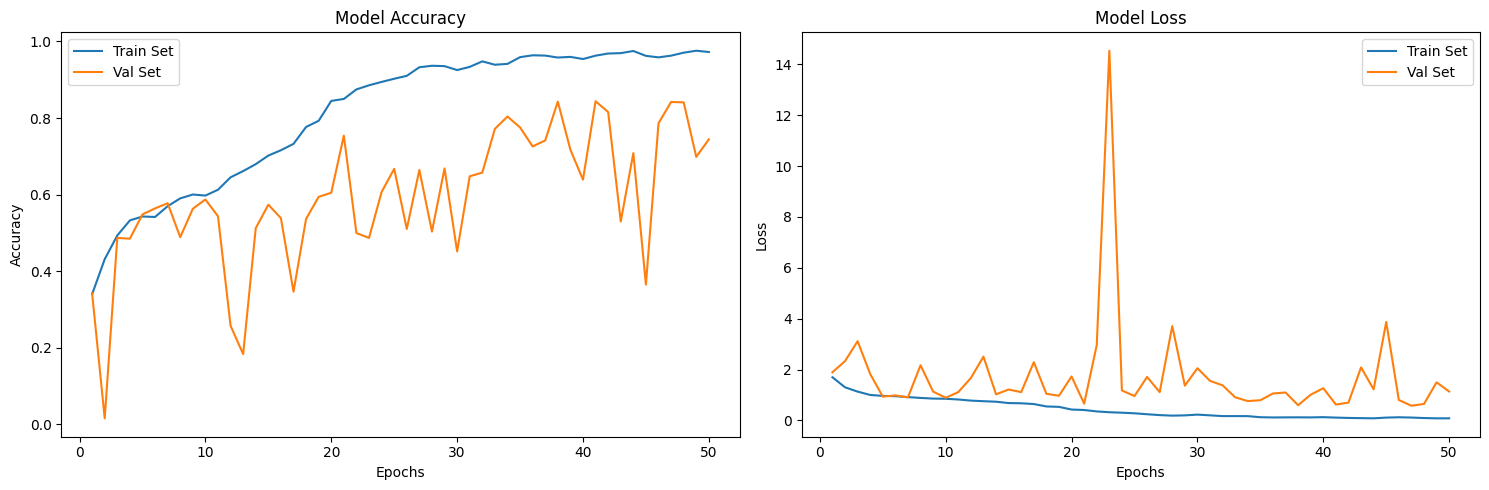

In [12]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(1, len(history.epoch) + 1)

plt.figure(figsize=(15,5))

plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Train Set')
plt.plot(epochs_range, val_acc, label='Val Set')
plt.legend(loc="best")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Model Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Train Set')
plt.plot(epochs_range, val_loss, label='Val Set')
plt.legend(loc="best")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Model Loss')

plt.tight_layout()
plt.show()

## 11. Prediction of model

In [13]:
pred_labels = model.predict(val_data)

33/33 [==============================] - 8s 243ms/step


## 12. Plot The Confusion Matrix to Understand The Classification In Detail

Confusion Matrix between the true labels and the predicted labels using the confusion_matrix function from scikit-learn.

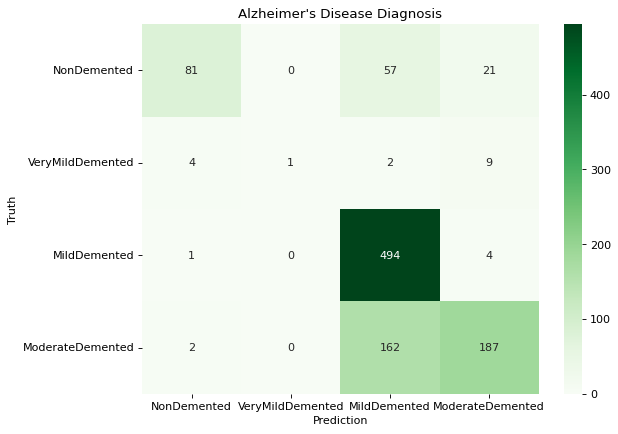

In [14]:
pred_ls = np.argmax(pred_labels, axis=1)
test_ls = np.argmax(val_labels, axis=1)

conf_arr = confusion_matrix(test_ls, pred_ls)

plt.figure(figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')

ax = sns.heatmap(conf_arr, cmap='Greens', annot=True, fmt='d', xticklabels=CLASSES, yticklabels=CLASSES)

plt.title('Alzheimer\'s Disease Diagnosis')
plt.xlabel('Prediction')
plt.ylabel('Truth')
plt.show()

## How to reduce the risk of developing Alzheimer's disease

`Regular exercise:` Staying physically active can help improve blood flow to the brain, reduce inflammation, and promote the growth of new brain cells.

`Healthy diet:` Eating a balanced diet that is rich in fruits, vegetables, whole grains, and lean proteins may help reduce the risk of Alzheimer's and other chronic diseases.

`Mental stimulation:` Engaging in activities that challenge the brain, such as reading, puzzles, or learning new skills, may help keep the brain active and reduce the risk of cognitive decline.

`Social engagement:` Maintaining social connections and participating in activities with others can help reduce stress, improve mood, and promote cognitive health.

`Quality sleep:` Getting enough restful sleep is important for overall health, and may help reduce the risk of cognitive decline.

`Management of health conditions:` Controlling conditions such as high blood pressure, high cholesterol, and diabetes may help reduce the risk of Alzheimer's disease.

`Avoidance of harmful substances:` Limiting or avoiding alcohol, tobacco, and other harmful substances may help protect the brain and reduce the risk of cognitive decline.

##  What to do when a patient has Alzheimer's:

`Educate yourself:` Learn as much as you can about the disease and its progression, including the symptoms, treatments, and strategies for managing behavioral changes.

`Seek medical care:` Work with a doctor or healthcare professional who has experience treating Alzheimer's disease, and follow their recommendations for medications, therapies, and lifestyle modifications.

`Create a safe environment:` Modify the patient's living environment to reduce the risk of falls and other accidents, and ensure that the home is secure to prevent wandering.

`Establish routines:` Create predictable daily routines and schedules to help the patient feel more secure and in control.

`Provide social interaction:` Encourage social interaction and engagement with others to help the patient maintain social connections and prevent isolation.

`Consider support groups:` Joining a support group for caregivers or people with Alzheimer's disease can provide emotional support and practical tips for coping with the challenges of the disease.

`Be patient and compassionate:` Alzheimer's disease can be frustrating and overwhelming for both the patient and their caregivers, so it is important to approach the situation with patience, compassion, and empathy.